<a href="https://colab.research.google.com/github/louismathewbt23/Bioinformatics/blob/main/Expt_8_1RV23BT034.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-lato libauthen-sasl-perl libclone-perl libdata-dump-perl
  libencode-locale-perl libfile-listing-perl libfont-afm-perl
  libhtml-form-perl libhtml-format-perl libhtml-parser-perl
  libhtml-tagset-perl libhtml-tree-perl libhttp-cookies-perl
  libhttp-daemon-perl libhttp-date-perl libhttp-message-perl
  libhttp-negotiate-perl libio-html-perl libio-socket-ssl-perl
  liblwp-mediatypes-perl liblwp-protocol-https-perl libmailtools-perl
  libnet-http-perl libnet-smtp-ssl-perl libnet-ssleay-perl libruby3.0
  libtry-tiny-perl liburi-perl libwww-perl libwww-robotrules-perl lynx
  lynx-common netbase perl-openssl-defaults rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration
Suggested packages:
  libdigest-hmac-perl libgssapi-perl libcrypt-ssleay-perl libsub-name-perl
  libbusiness-isbn-perl libauthe

Saving blasts.fasta to blasts.fasta
Uploaded file: blasts.fasta
Running MAFFT alignment on blasts.fasta...
MAFFT output (stderr):
nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

    1 / 5
done.

Constructing a UPGMA tree (efffree=0) ... 

    0 / 5
done.

Progressive alignment 1/2... 

STEP     1 / 4  f
STEP     2 / 4  f
STEP     3 / 4  f
STEP     4 / 4  f
done.

Making a distance matrix from msa.. 

    0 / 5
done.

Constructing a UPGMA tree (efffree=1) ... 

    0 / 5
done.

Progressive alignment 2/2... 

STEP     1 / 4  f
STEP     2 / 4  f
STEP     3 / 4  f
STEP     4 / 4  f
done.

disttbfast (aa) Version 7.525
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

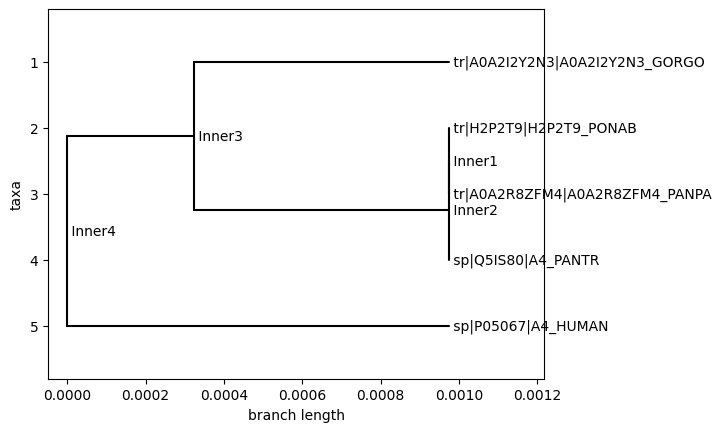

                 ______________________________ tr|A0A2I2Y2N3|A0A2I2Y2N3_GORGO
                |
  ______________|                              , tr|H2P2T9|H2P2T9_PONAB
 |              |                              |
 |              |______________________________| tr|A0A2R8ZFM4|A0A2R8ZFM4_PANPA
_|                                             |
 |                                             | sp|Q5IS80|A4_PANTR
 |
 |_____________________________________________ sp|P05067|A4_HUMAN



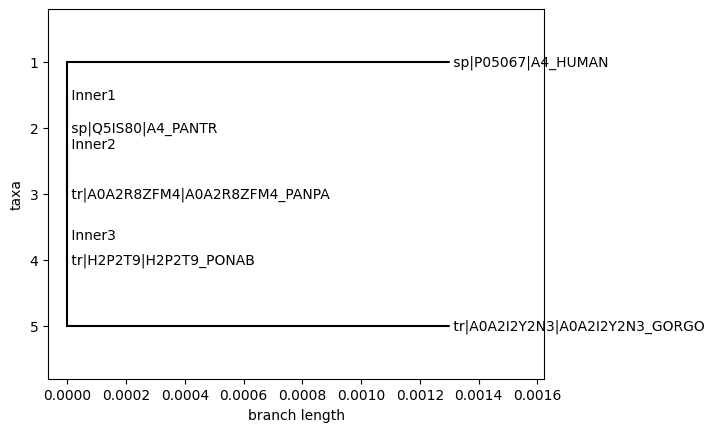

  _____________________________________________ sp|P05067|A4_HUMAN
 |
 | sp|Q5IS80|A4_PANTR
 |
 | tr|A0A2R8ZFM4|A0A2R8ZFM4_PANPA
_|
 | tr|H2P2T9|H2P2T9_PONAB
 |
 |____________________________________________ tr|A0A2I2Y2N3|A0A2I2Y2N3_GORGO



In [ ]:
# Install required packages
!apt-get install -y mafft
!pip install biopython

# Imports (part 1: non-problematic)
from Bio import AlignIO, Phylo
from IPython.display import IFrame
from google.colab import files
import subprocess # Import subprocess for direct command execution
import os

# Diagnostic: Check Biopython installation structure (optional now, but kept for context)
import Bio # Import Bio to get its root path

biopython_root_path = os.path.dirname(Bio.__file__)
print(f"Biopython root path: {biopython_root_path}")

align_module_path = os.path.join(biopython_root_path, 'Align')
print(f"Checking for Bio.Align module at: {align_module_path}")
!ls -ld "{align_module_path}" # Use -ld to show directory itself

applications_module_path = os.path.join(align_module_path, 'Applications')
print(f"Checking for Bio.Align.Applications module at: {applications_module_path}")
!ls -l "{applications_module_path}"

# Imports (part 2: problematic one and its dependencies) - MafftCommandline removed
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

# --- Upload sequences file ---
print("Please upload your FASTA file containing sequences for alignment.")
uploaded = files.upload()

if not uploaded:
    print("No file uploaded. Please upload a FASTA file to proceed.")
    raise ValueError("No FASTA file uploaded.")

# Get the name of the uploaded file
sequences_file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {sequences_file_name}")

# Run MAFFT alignment using subprocess instead of MafftCommandline
print(f"Running MAFFT alignment on {sequences_file_name}...")
try:
    # Using subprocess.run for direct execution of mafft
    result = subprocess.run(['mafft', sequences_file_name], capture_output=True, text=True, check=True)
    stdout = result.stdout
    stderr = result.stderr
    if stderr:
        print("MAFFT output (stderr):\n" + stderr)
    print("MAFFT alignment successful.")
except subprocess.CalledProcessError as e:
    print(f"MAFFT command failed with error code {e.returncode}\n" \
          f"Stderr: {e.stderr}\n" \
          f"Stdout: {e.stdout}")
    raise
except FileNotFoundError:
    print("Error: 'mafft' command not found. Ensure MAFFT is installed.")
    raise

# Save aligned sequences
aligned_file_name = "aligned.fasta"
with open(aligned_file_name, "w") as handle:
    handle.write(stdout)

# Read alignment
align = AlignIO.read(aligned_file_name, "fasta")

# Download aligned file
files.download(aligned_file_name)

# Optional: open alignment viewer
IFrame("https://fast.alignmentviewer.org/", width="100%", height=1200)

# ---- Phylogenetic Tree Construction ----

# Check if there are enough sequences for tree construction
if len(align) < 2:
    print("Warning: Not enough sequences (less than 2) for phylogenetic tree construction.")
    print("Please upload a FASTA file containing at least two sequences to build a tree.")
else:
    # Calculate distance matrix
    calculator = DistanceCalculator("identity")
    distMatrix = calculator.get_distance(align)

    # Create constructor
    constructor = DistanceTreeConstructor()

    # UPGMA tree
    UPGMATree = constructor.upgma(distMatrix)
    Phylo.draw(UPGMATree)          # graphical tree
    Phylo.draw_ascii(UPGMATree)    # ASCII tree in terminal

    # Neighbor-Joining tree
    NJTree = constructor.nj(distMatrix)
    Phylo.draw(NJTree)             # graphical tree
    Phylo.draw_ascii(NJTree)       # ASCII tree in terminal